### 0. Описание задачи

Набор данных для прогнозирования диабета представляет собой набор медицинских и демографических данных от пациентов, а также их диабетический статус (положительный или отрицательный). Данные включают такие характеристики, как возраст, пол, индекс массы тела (ИМТ), гипертония, болезни сердца, история курения, уровень HbA1c и глюкозы в крови. Этот набор данных может быть использован для построения моделей машинного обучения для прогнозирования диабета у пациентов на основе их истории болезни и демографической информации. Это может быть полезно медицинским работникам при выявлении пациентов, которые могут быть подвержены риску развития диабета, и при разработке персонализированных планов лечения. Кроме того, набор данных может быть использован исследователями для изучения взаимосвязи между различными медицинскими и демографическими факторами и вероятностью развития диабета.

Характеристики датасета:
- gender: Гендер относится к биологическому полу человека, который может оказывать влияние на его восприимчивость к диабету
- age: Возраст
- hypertension: Гипертония - это заболевание, при котором кровяное давление в артериях постоянно повышено
- heart_disease: Болезни сердца - это еще одно заболевание, которое связано с повышенным риском развития диабета
- smoking_history: Курение в анамнезе также считается фактором риска развития диабета и может усугубить связанные с ним осложнения
- bmi: ИМТ (индекс массы тела) - это показатель жировых отложений в организме, основанный на весе и росте
- HbA1c_level: Уровень HbA1c (гемоглобина A1c) - это показатель среднего уровня сахара в крови человека за последние 2-3 месяца
- blood_glucose_level: Уровень глюкозы в крови относится к количеству глюкозы в кровотоке в данный момент времени
- diabetes: Диабет является прогнозируемой целевой переменной, значения которой равны 1, указывающей на наличие диабета, и 0

Задача состоит в том, чтобы по набору данных составить модель, которая будет прогнозировать наличие диабета у человека

### 1. Прочитать данные

подключаем нужные библиотеки:

In [619]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
%matplotlib inline

указываем путь до файла:

In [620]:
file = 'D:\\wwww\\diabetes_prediction_dataset.csv'
df = pd.read_csv(file)

In [621]:
df.head(100)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
95,Male,19.0,0,0,never,27.32,6.1,80,0
96,Female,67.0,0,0,never,27.32,6.2,159,1
97,Male,11.0,0,0,No Info,27.32,6.1,90,0
98,Female,30.0,0,0,No Info,50.13,6.0,100,0


In [622]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [624]:
df = df[df['gender'].isin(['Male', 'Female'])]
df['gender'] = df['gender'].astype('category')
df['smoking_history'] = df['smoking_history'].astype('category')

### 2. Визуализировать данные и вычислить основные характеристики

In [626]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000
mean,41.888076,0.074863,0.039427,27.320757,5.527529,138.057810,0.085015
std,22.517206,0.263172,0.194610,6.636853,1.070665,40.709469,0.278906
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


Средний возраст пациента - 42 года. Гипертония есть у 7.5% клиентов, проблемы с сердцем у 4%, индекс bmi - 27, показатель гемоглобина - 5.5, уровень глюкозы в крови - 138, диабет есть у 8.5% пациентов.

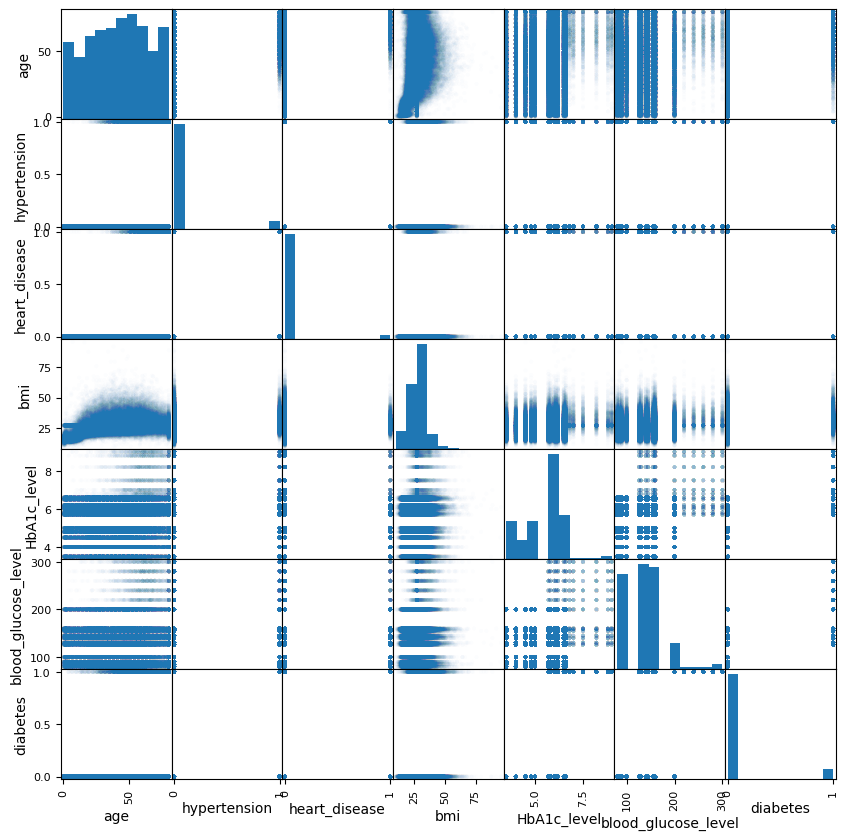

In [627]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha = .01, figsize = (10, 10))
pass

<Axes: >

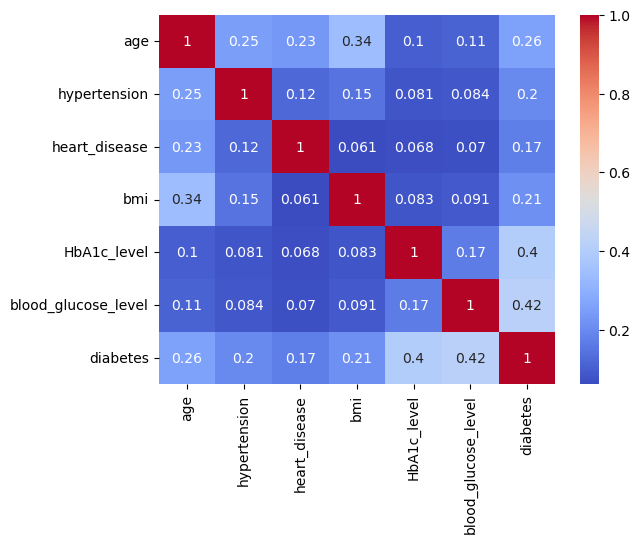

In [628]:
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

Сильной корелляции между признаками не наблюдается

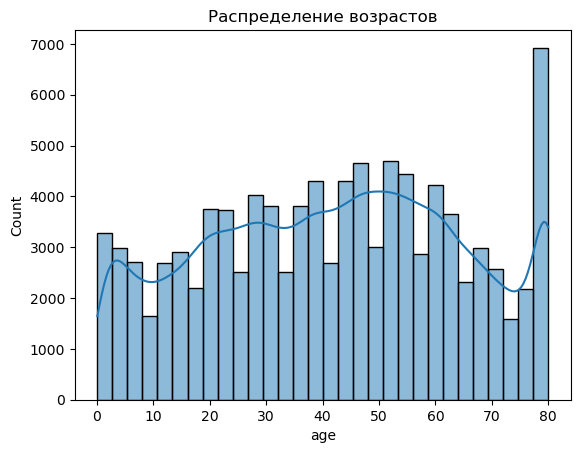

In [629]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Распределение возрастов')
plt.show()

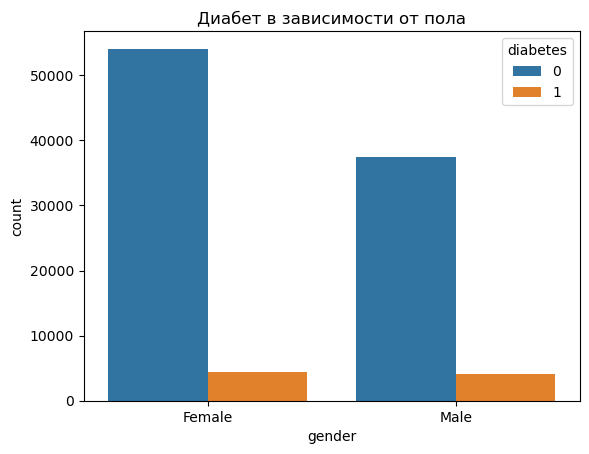

In [630]:
sns.countplot(data=df, x='gender', hue='diabetes')
plt.title('Диабет в зависимости от пола')
plt.show()

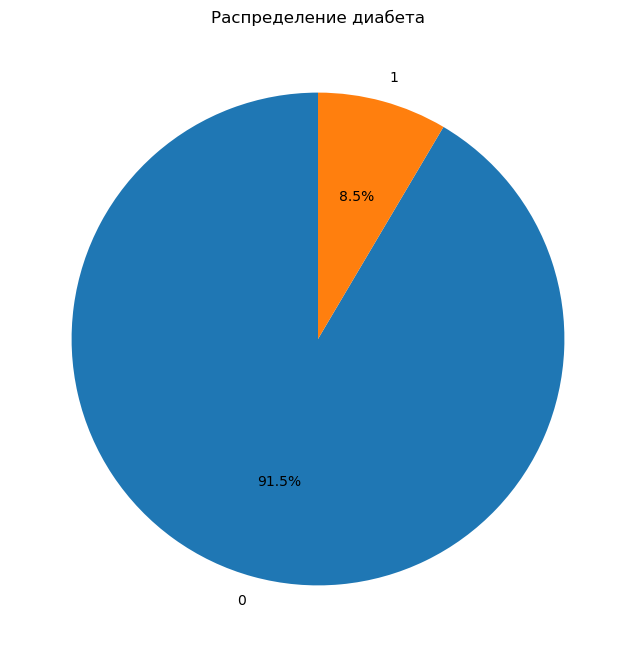

In [631]:
df['diabetes'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Распределение диабета')
plt.ylabel('')
plt.show()

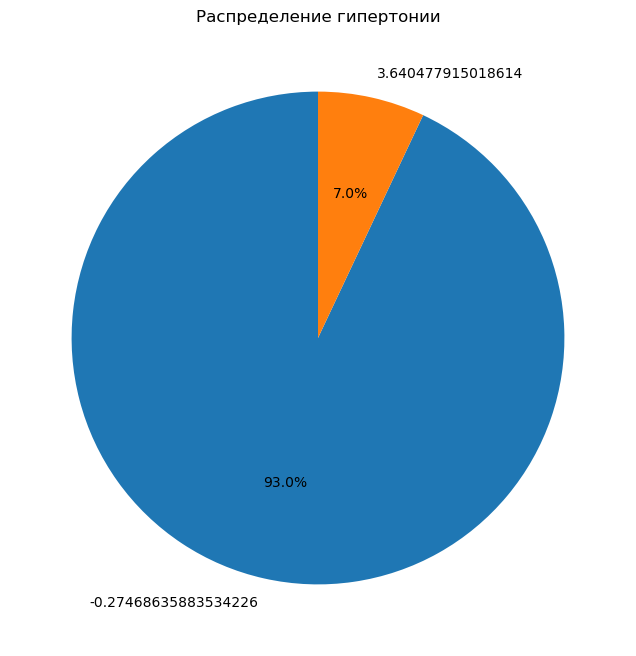

In [713]:
df['hypertension'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Распределение гипертонии')
plt.ylabel('')
plt.show()

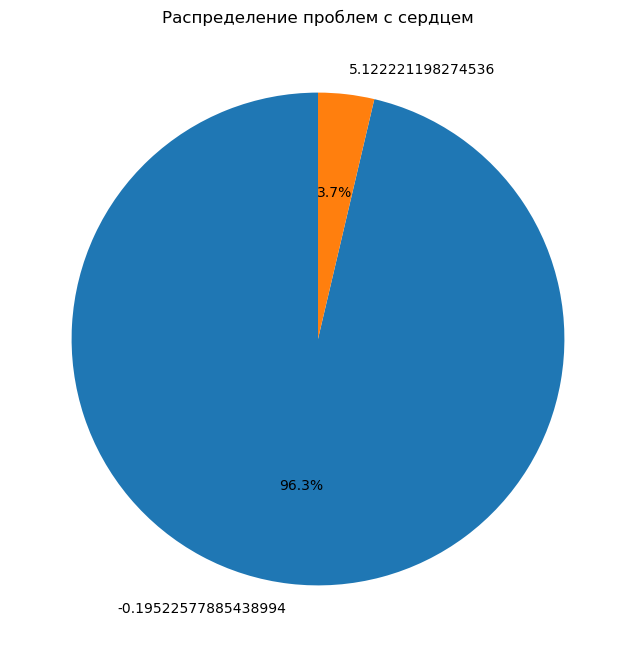

In [715]:
df['heart_disease'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Распределение проблем с сердцем')
plt.ylabel('')
plt.show()

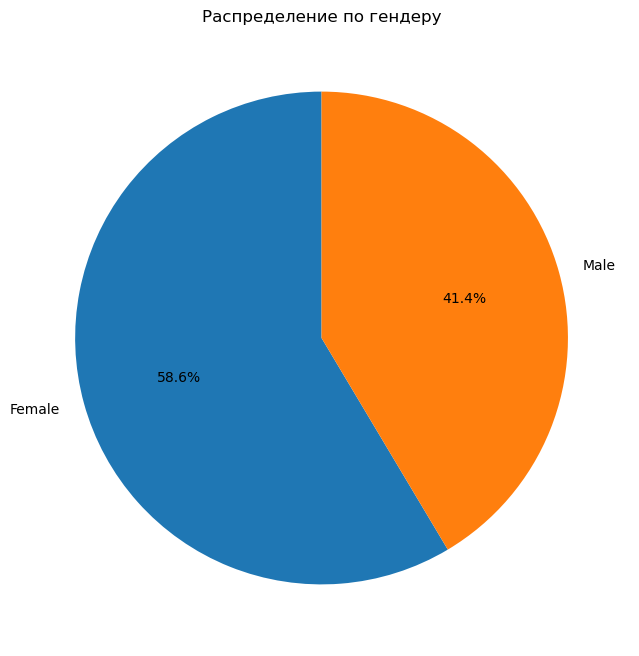

In [632]:
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Распределение по гендеру')
plt.ylabel('')
plt.show()

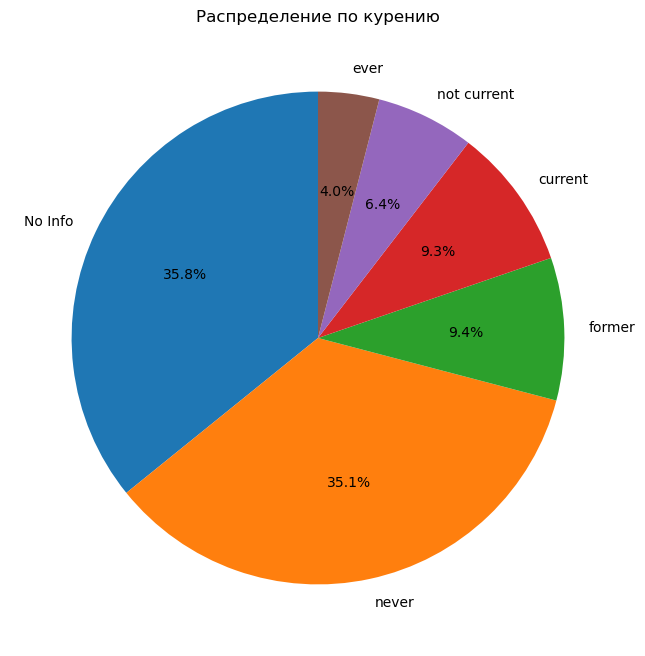

In [633]:
df['smoking_history'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Распределение по курению')
plt.ylabel('')
plt.show()

<Axes: >

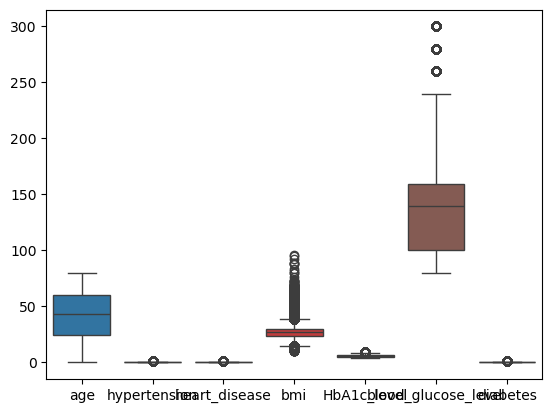

In [634]:
sns.boxplot(df)

Обработаем выбросы

In [635]:
df.quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995], numeric_only=True)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0.005,0.56,0.0,0.0,13.8900,3.5,80.0,0.0
0.010,1.08,0.0,0.0,14.6000,3.5,80.0,0.0
0.050,4.00,0.0,0.0,16.8200,3.5,80.0,0.0
0.100,10.00,0.0,0.0,19.1800,4.0,85.0,0.0
0.500,43.00,0.0,0.0,27.3200,5.8,140.0,0.0
0.900,73.00,0.0,0.0,35.4700,6.6,200.0,0.0
0.950,80.00,1.0,0.0,39.4900,6.6,200.0,1.0
0.990,80.00,1.0,1.0,48.7919,8.8,280.0,1.0
0.995,80.00,1.0,1.0,52.5000,9.0,300.0,1.0


In [636]:
rows_to_drop = df[
    (df['bmi'] < df['bmi'].quantile(0.005)) | (df['bmi'] > df['bmi'].quantile(0.995)) |
    (df['blood_glucose_level'] < df['blood_glucose_level'].quantile(0.005)) | (df['blood_glucose_level'] > df['blood_glucose_level'].quantile(0.97))].index
df = df.drop(rows_to_drop)

<Axes: >

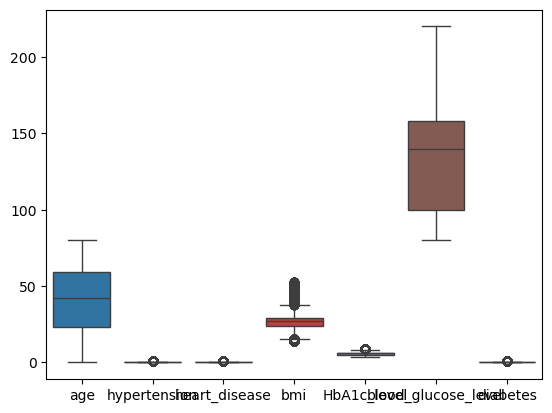

In [637]:
sns.boxplot(df)

### 3. Обработать пропущенные значения (или убедиться что их нет)

In [639]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Пропущенных значений нет 

### 4. Обработать категориальные признаки

In [641]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96366 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               96366 non-null  category
 1   age                  96366 non-null  float64 
 2   hypertension         96366 non-null  int64   
 3   heart_disease        96366 non-null  int64   
 4   smoking_history      96366 non-null  category
 5   bmi                  96366 non-null  float64 
 6   HbA1c_level          96366 non-null  float64 
 7   blood_glucose_level  96366 non-null  int64   
 8   diabetes             96366 non-null  int64   
dtypes: category(2), float64(3), int64(4)
memory usage: 6.1 MB


Разделим столбцы на категориальные и численные

In [642]:
num_colum = [c for c in df.columns if df[c].dtype.name != 'category']
categor_colum = [c for c in df.columns if df[c].dtype.name == 'category']
num_colum.remove('diabetes')
data_describe = df.describe(include = ['category'])

Разделим категориальные признаки на бинарные и небинарные

In [643]:
binary_columns    = [c for c in categor_colum if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categor_colum if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['gender'] ['smoking_history']


In [644]:
print(df['gender'].unique())

['Female', 'Male']
Categories (2, object): ['Female', 'Male']


Заменим в бинарном признаке значения Female и Male на 0 и 1

In [645]:
for col in binary_columns:
    df = df.replace({col: {'Female': 0, 'Male': 1}})
    print(df[col].describe())
    print()

count     96366
unique        2
top           0
freq      56535
Name: gender, dtype: int64



C:\Users\popov\AppData\Local\Temp\ipykernel_28984\4048624017.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({col: {'Female': 0, 'Male': 1}})
C:\Users\popov\AppData\Local\Temp\ipykernel_28984\4048624017.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df = df.replace({col: {'Female': 0, 'Male': 1}})


Для небинарных признаков: разделим каждый признак с s значениями на s признаков со значениями 0 и 1

In [646]:
data_nonbin = pd.get_dummies(df[nonbinary_columns])
data_nonbin[data_nonbin.select_dtypes('bool').columns] = data_nonbin.select_dtypes('bool').astype(int)
data_nonbin.describe()

,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
count,96366.000000,96366.000000,96366.000000,96366.000000,96366.000000,96366.000000
mean,0.361185,0.092481,0.040024,0.091350,0.350954,0.064006
std,0.480347,0.289705,0.196018,0.288107,0.477271,0.244765
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 5. Нормализация числовых признаков

In [648]:
data_num = df[num_colum]
data_num.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
count,96366.000000,96366.000000,96366.000000,96366.000000,96366.000000,96366.000000
mean,41.524580,0.070160,0.036714,27.122088,5.488486,134.399747
std,22.399596,0.255417,0.188060,6.155209,1.044441,34.528515
min,0.080000,0.000000,0.000000,13.890000,3.500000,80.000000
25%,23.000000,0.000000,0.000000,23.580000,4.800000,100.000000
50%,42.000000,0.000000,0.000000,27.320000,5.800000,140.000000
75%,59.000000,0.000000,0.000000,29.290000,6.200000,158.000000
max,80.000000,1.000000,1.000000,52.500000,9.000000,220.000000


Выполним нормализацию числовых данных

In [649]:
data_num = (data_num - data_num.mean()) / data_num.std()
data_num.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
count,9.636600e+04,9.636600e+04,9.636600e+04,9.636600e+04,9.636600e+04,9.636600e+04
mean,2.612387e-16,6.134649e-17,-2.005558e-17,1.445182e-17,1.651636e-17,4.087800e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.850238e+00,-2.746864e-01,-1.952258e-01,-2.149738e+00,-1.903875e+00,-1.575502e+00
25%,-8.270051e-01,-2.746864e-01,-1.952258e-01,-5.754619e-01,-6.591903e-01,-9.962707e-01
50%,2.122449e-02,-2.746864e-01,-1.952258e-01,3.215352e-02,2.982594e-01,1.621921e-01
75%,7.801667e-01,-2.746864e-01,-1.952258e-01,3.522076e-01,6.812392e-01,6.835004e-01
max,1.717684e+00,3.640478e+00,5.122221e+00,4.122997e+00,3.362098e+00,2.479118e+00


Соединим все столбцы в одну таблицу

In [650]:
df = pd.concat((data_num, data_nonbin, df[binary_columns], df['diabetes']), axis = 1)
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,diabetes
count,9.636600e+04,9.636600e+04,9.636600e+04,9.636600e+04,9.636600e+04,9.636600e+04,96366.000000,96366.000000,96366.000000,96366.000000,96366.000000,96366.000000,96366.000000
mean,2.612387e-16,6.134649e-17,-2.005558e-17,1.445182e-17,1.651636e-17,4.087800e-16,0.361185,0.092481,0.040024,0.091350,0.350954,0.064006,0.059316
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.480347,0.289705,0.196018,0.288107,0.477271,0.244765,0.236216
min,-1.850238e+00,-2.746864e-01,-1.952258e-01,-2.149738e+00,-1.903875e+00,-1.575502e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.270051e-01,-2.746864e-01,-1.952258e-01,-5.754619e-01,-6.591903e-01,-9.962707e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.122449e-02,-2.746864e-01,-1.952258e-01,3.215352e-02,2.982594e-01,1.621921e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.801667e-01,-2.746864e-01,-1.952258e-01,3.522076e-01,6.812392e-01,6.835004e-01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.717684e+00,3.640478e+00,5.122221e+00,4.122997e+00,3.362098e+00,2.479118e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 6. Разбиение данных на обучающую и тестовую выборки

Разделим данные в процентном соотношении 85 к 15

In [652]:
X = df.drop(['diabetes'], axis = 1)
y = df['diabetes']

In [653]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
X_train.shape[0], X_test.shape[0]

(81911, 14455)

### 7. Классификатор ближайших соседей

In [690]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_n = KNeighborsClassifier(n_neighbors=3)
k_n.fit(X_train, y_train)

y_train_predict = k_n.predict(X_train)
y_test_predict = k_n.predict(X_test)

print('err_train=', np.mean(y_train != y_train_predict), 'err_test=', np.mean(y_test != y_test_predict))
print(f'Accuracy Score train : {accuracy_score(y_train, y_train_predict)*100}')
print(f'Accuracy Score test : {accuracy_score(y_test, y_test_predict)*100}')

err_train= 0.027249087424155487 err_test= 0.04047042545831892
Accuracy Score train : 97.27509125758445
Accuracy Score test : 95.95295745416811


Ошибка составила 2.7% на тренировочной и 4% на тестовой выборке. Подберем оптимальный параметр для метода

### 8. Подбор гиперпараметров

In [694]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': n})
grid.fit(X_train, y_train)

best_err = 1 - grid.best_score_
best_n = grid.best_estimator_.n_neighbors
print(best_err, best_n)

knn = KNeighborsClassifier(n_neighbors = best_n)
knn.fit(X_train, y_train)
err_train = 1 - knn.score(X_train, y_train)
err_test = 1 - knn.score(X_test, y_test)
print(err_train, err_test)
print(f'Accuracy Score train : {knn.score(X_train, y_train)}')
print(f'Accuracy Score test : {knn.score(X_test, y_test)}')

0.04009230113253248 17
0.03773607940325474 0.03694223452092704
Accuracy Score train : 0.9622639205967453
Accuracy Score test : 0.963057765479073


Оптимальным параметром оказалось значение 17. При нем ошибки на тренировочной выборке - 3.8%, на тестовой - 3.7%

### 9. Общие выводы

- В данной задаче числовые признаки не имеют высокой степени корреляции между собой, поэтому нет необходимости исключать некоторые из них.
- При решении методом ближайщих соседей с подбором параметра точность составила на тренировочной выборке - 96,2%, на тестовой - 96,3%